In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [9]:
#Create datframe 
def extract_data(rey_num):
    base_path='/work/Files_for_Flow/Data/Retau_%%_basic_stats.txt'
    path=base_path.replace('%%',rey_num)
    data1=open(path, 'r')
    data2=[]
    for line in data1.readlines(): 
        data2.append(line.split())
    data1.close()
    data2=data2[6:]
    Re_tau=data2[0]
    R=0.45
    rey_df=pd.DataFrame(data2).astype(float)
    rey_df.columns=['y(m)','U(m/s)','u\'(m/s)']
    rey_df['r/R']=(R-rey_df['y(m)'])/R
    rey_df['regval_x']=(1-rey_df['r/R'])
    rey_df.drop(columns=['u\'(m/s)','y(m)'], inplace=True)
    return rey_df

In [21]:
extract_data('35k')

,U(m/s),r/R,regval_x
0,11.09921,0.999682,0.000318
1,12.12418,0.999624,0.000376
2,12.32062,0.999602,0.000398
3,13.06377,0.999547,0.000453
4,13.37399,0.999509,0.000491
5,14.10561,0.999422,0.000578
6,15.04922,0.999296,0.000704
7,16.04156,0.999084,0.000916
8,16.83695,0.998816,0.001184
9,17.74345,0.998356,0.001644


In [3]:
extract_data('20k')

,U(m/s),r/R,regval_x
0,5.79720,0.999589,0.000411
1,6.22192,0.999542,0.000458
2,6.61037,0.999502,0.000498
3,6.98136,0.999451,0.000549
4,7.25420,0.999411,0.000589
5,7.86460,0.999316,0.000684
6,8.50892,0.999184,0.000816
7,9.07957,0.999018,0.000982
8,9.74162,0.998753,0.001247
9,10.31233,0.998378,0.001622


In [4]:
Coefficient=[]
Coeff_untrans=[]
regression_error=[]
def linreg(rey_num):
    array=(extract_data(rey_num).to_numpy())[:,[0,2]]
    array_log=np.log(array)
    npoints =len(array)
    V = np.zeros((npoints,2)) # Vandermonde matrix initialization 

    for i in range(npoints):
	    for j in range(2):
		    V[i,j]=array_log[i,1]**j
    A = (V.transpose()).dot(V)
    rhs = (V.transpose()).dot(array_log[:,0])
    a = np.linalg.solve(A,rhs)
    Coeff_untrans.append(a)
    x_axis=array_log[:,1]
    y_axis=array_log[:,0]
    y_guess=a[0]+a[1]*x_axis
    plt.plot(x_axis,y_axis,'o', label=rey_num)
    plt.plot(x_axis,y_guess,color='black', label='regression')
    plt.xlabel('ln(1-r/R)')
    plt.ylabel('ln(U)')
    plt.legend()
    plt.show()
    Coefficient.append([np.exp(a[0]),1/a[1]])
    y_guesstrans=np.exp(a[0])+((1/a[1])*array[:,1])
    regression_error.append(np.mean(np.abs(array[:,0]-y_guesstrans)))

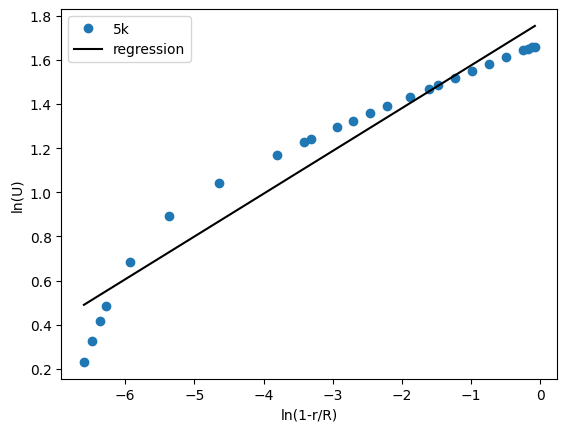

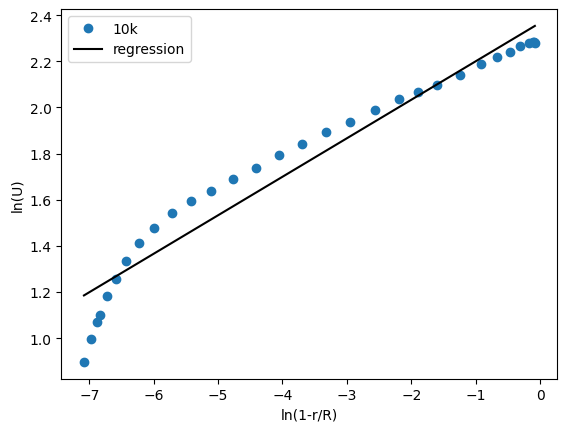

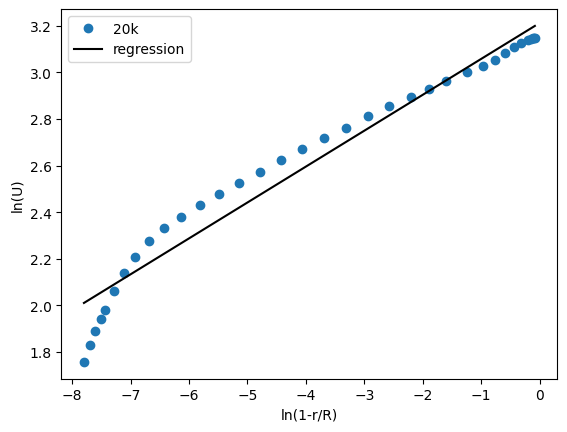

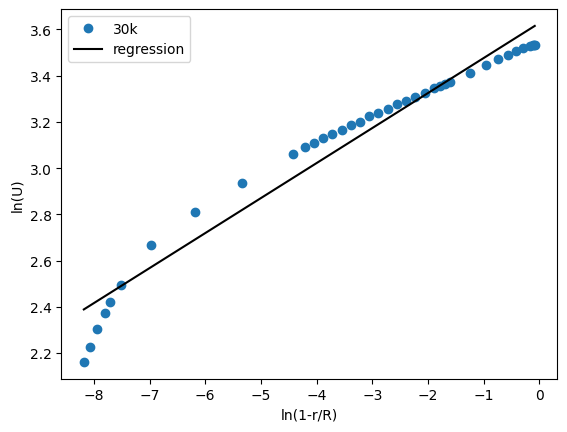

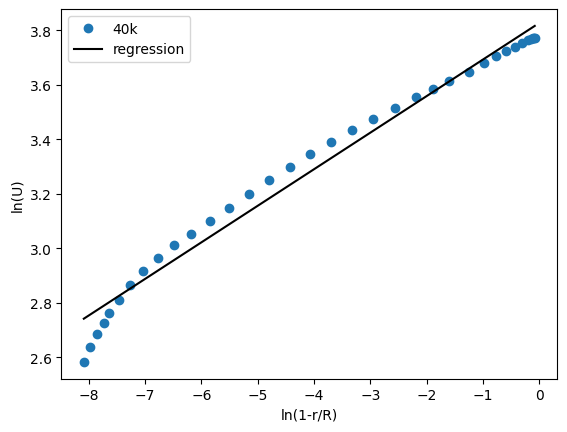

In [5]:
rey_num=['5k','10k','20k','30k','40k']
for i in rey_num:
    linreg(i)


In [6]:
regression_error

[3.483274270624879,
 5.6067924277293955,
 11.129099564450458,
 14.659365071621792,
 18.116171030432206]

In [7]:
coeff_table=[]
Reynum_array=np.array([5522,9906,21337,31793,39855])
for i in range(5):
    coeff_table.append([Reynum_array[i],Coefficient[i][0],Coefficient[i][1]])
coeff_array=np.array(coeff_table)
coeff_table

[[5522, 5.868295678037469, 5.155870647871982],
 [9906, 10.663754743490907, 5.993802470889954],
 [21337, 24.822634070267245, 6.490288965338497],
 [31793, 37.626684902531764, 6.6032100335694865],
 [39855, 45.930574945848456, 7.45120791216567]]

In [8]:
def Lag_interp(xi, fi, x_target):
    x_target=float(x_target)
    a_l = fi
    Ns = len(xi)
    # Interpolate onto x points 

    p_l = np.zeros_like(x_target)

    for j in range(Ns):
        Lp_j = 1. # Initialize Lagrange Polynomial
        for k in range(Ns):
            if j != k:
                Lp_j *= (x_target - xi[k]) / (xi[j] - xi[k])
        p_l += a_l[j] * Lp_j
    return p_l

In [9]:
X_val=Reynum_array
Y_val=np.array(Coefficient)
U_max35=Lag_interp(X_val, Y_val[:,0], 35061)
n_35=Lag_interp(X_val, Y_val[:,1], 35061)
print(U_max35,n_35)

41.221285003034794 6.832213365701882


In [10]:
k35_path='/work/Files_for_Flow/Data/Retau_35k_basic_stats.txt'
data_35k=open(k35_path, 'r')
data2_35k=[]
for line in data_35k.readlines():
    data2_35k.append(line.split())
data_35k.close()
data2_35k=data2_35k[6:]
Re_tau_35k=data2_35k[0]
R=0.45
k35_df=pd.DataFrame(data2_35k)
k35_df=k35_df.astype(float)
k35_df.columns=['y(m)','U(m/s)','u\'(m/s)']
k35_df['U_guess']=U_max35*(1-((R-k35_df['y(m)'])/R))**(1/n_35)
k35_df['rad_ratio']=(R-k35_df['y(m)'])/R
k35_df.drop(columns=['u\'(m/s)'], inplace=True)

In [11]:
k35_df

,y(m),U(m/s),U_guess,rad_ratio
0,0.000143,11.09921,12.680993,0.999682
1,0.000169,12.12418,12.994877,0.999624
2,0.000179,12.32062,13.104679,0.999602
3,0.000204,13.06377,13.357851,0.999547
4,0.000221,13.37399,13.515265,0.999509
5,0.000260,14.10561,13.840609,0.999422
6,0.000317,15.04922,14.248042,0.999296
7,0.000412,16.04156,14.805297,0.999084
8,0.000533,16.83695,15.373940,0.998816
9,0.000740,17.74345,16.130318,0.998356


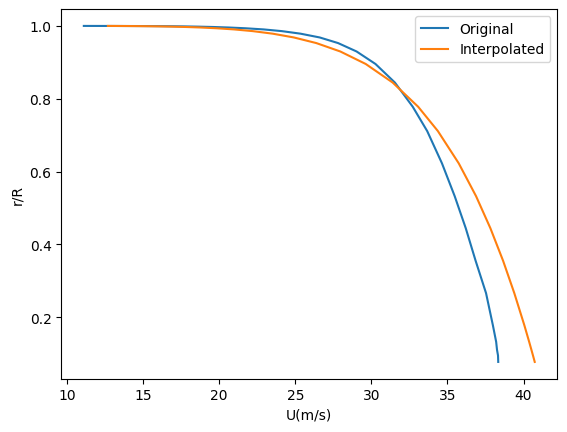

In [12]:
y=k35_df['rad_ratio']
x_original=k35_df['U(m/s)']
x_guess=k35_df['U_guess']
plt.xlabel('U(m/s)')
plt.ylabel('r/R')

plt.plot(x_original,y, label='Original')
plt.plot(x_guess,y, label='Interpolated')

plt.legend()
plt.show()

In [13]:
mean_abs_error = np.mean(np.abs(x_original - x_guess))
print(mean_abs_error)

1.3809194989986602


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=2862c49b-4ca6-4b1c-adad-6d8ae1379427' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>